In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('CCPP_data.txt', delimiter='\t')

In [3]:
# Select only numeric columns for PCA
numeric_df = df.select_dtypes(include=[np.number])

In [4]:
# Standardize the variables before performing PCA
scaler = StandardScaler()
df_standardized = scaler.fit_transform(numeric_df)

In [5]:
# Perform PCA
pca = PCA()
pca.fit(df_standardized)

PCA()

In [10]:
# Step 2: Analyze the output of the PCA - the first two principal component loading vectors
loadings = pca.components_

In [11]:
loadings

array([[ 0.5344631 ,  0.49018343, -0.33409283, -0.29337725, -0.52571967],
       [-0.08033939,  0.07824417, -0.5983973 ,  0.79026642, -0.0694484 ],
       [-0.07825384, -0.4503986 , -0.71253389, -0.48330099,  0.22300907],
       [-0.39882432,  0.74208676, -0.14887524, -0.18422501,  0.48388398],
       [-0.73668872, -0.00681151, -0.02083896, -0.14795294, -0.65948389]])

In [ ]:
######  First Principal Component (First Row):The first principal component has strong positive loadings on the first variable (0.5344631) and the second variable (0.49018343), and a strong negative loading on the fifth variable (-0.52571967). This component can be interpreted as a measure that increases with the first two variables and decreases with the fifth variable. In other words, this component represents a contrast between these sets of variables.Second Principal Component (Second Row):The second principal component has a strong positive loading on the fourth variable (0.79026642) and negative loadings on the third variable (-0.5983973). This suggests that this component measures the variance in the data that is most explained by changes in these two variables, where an increase in the fourth variable is contrasted with a decrease in the third variable.

In [14]:
# Step 3: Calculate the percentage of variance explained by each component and plot
pve = pca.explained_variance_ratio_
cumulative_pve = np.cumsum(pve)
pve


array([0.66437362, 0.18291829, 0.11763241, 0.02793114, 0.00714454])

In [21]:
cumulative_pve

array([0.66437362, 0.84729191, 0.96492432, 0.99285546, 1.        ])

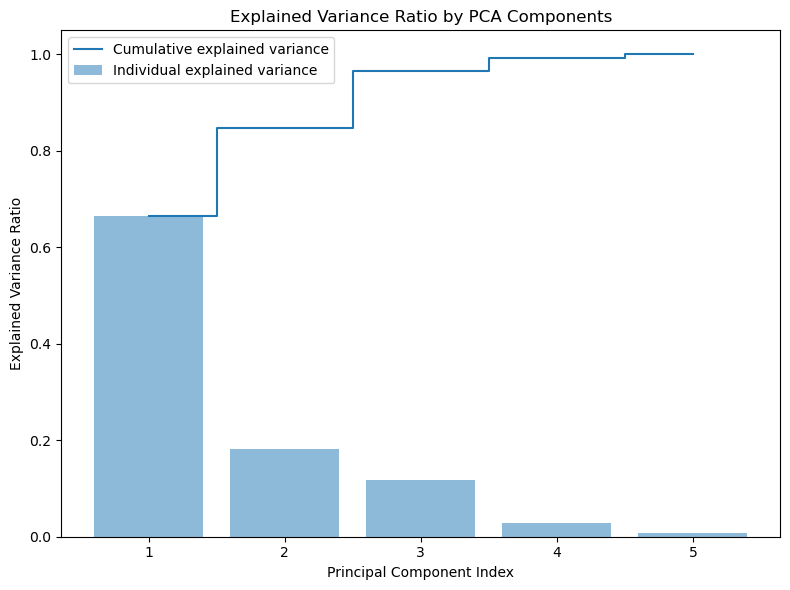

In [16]:
# Plotting the PVE explained by each component, as well as the cumulative PVE
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(pve) + 1), pve, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, len(cumulative_pve) + 1), cumulative_pve, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.title('Explained Variance Ratio by PCA Components')
plt.tight_layout()
plt.show()

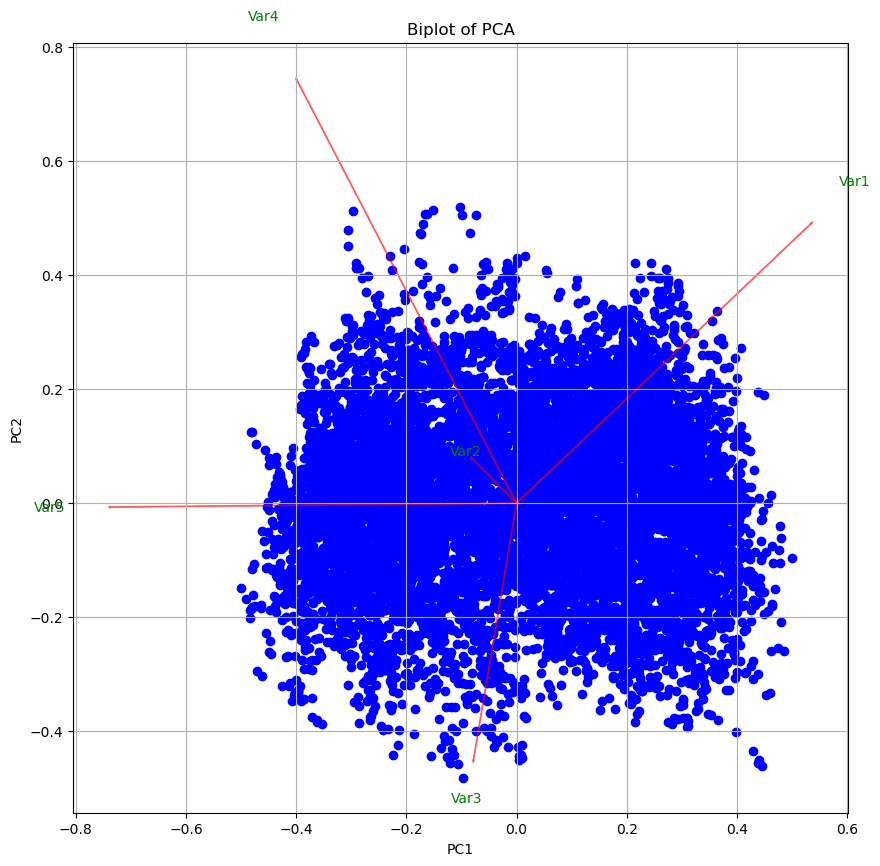

In [20]:
# Completing the biplot function and plotting the results:

def biplot(score, coeff, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c='blue')
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='red', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='green', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='green', ha='center', va='center')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Since the data is already standardized and PCA is already applied, we can directly use the biplot function.
# Use the function to plot the biplot
plt.figure(figsize=(10, 10))
biplot(pca.transform(df_standardized), pca.components_)
plt.title('Biplot of PCA')
plt.show()

